In [1]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df_churndata1 = pd.read_csv("TelcoCustomerChurn[MODIFIED].csv", index_col=0)
df_churndata1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0.115423,0.001275,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,1,1,...,1,0,0,0,1,0,1,0.385075,0.215867,0
2,3668-QPYBK,1,0,0,0,0.014085,1,0,1,1,...,0,0,0,0,0,1,1,0.354229,0.010310,1
3,7795-CFOCW,1,0,0,0,0.619718,0,0,1,1,...,1,1,0,0,1,0,0,0.239303,0.210241,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,1,0,...,0,0,0,0,0,1,0,0.521891,0.015330,1


In [3]:
# We store our churn column in a separate variable and drop it from dataset

churn = df_churndata1.pop('Churn')
churn[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [4]:
df_churndata1 = df_churndata1.drop(columns="customerID")

In [5]:
#split the data into training and testing

data_train, data_test, target_train, target_test = train_test_split(df_churndata1, churn, test_size = 0.25)

In [6]:
#Baseline tree classifier

tree_churn = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_churn.fit(data_train, target_train)
tree_churn.score(data_test, target_test)

0.7957906712172924

In [7]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, tree_churn.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0
SeniorCitizen -> 0.0004388229880320605
Partner -> 0.0
Dependents -> 0.0
tenure -> 0.18241446388889185
PhoneService -> 0.01654328367774255
MultipleLines -> 0.023399860204742925
InternetService -> 0.02733948062675394
OnlineSecurity -> 0.0
OnlineBackup -> 0.0
DeviceProtection -> 0.0
TechSupport -> 0.02754827349422737
StreamingTV -> 0.0010350027125439237
StreamingMovies -> 0.006798888947422632
Contract -> 0.5355323169473173
PaperlessBilling -> 0.0
PaymentMethod -> 0.0
MonthlyCharges -> 0.14568286754082094
TotalCharges -> 0.033266738971504596


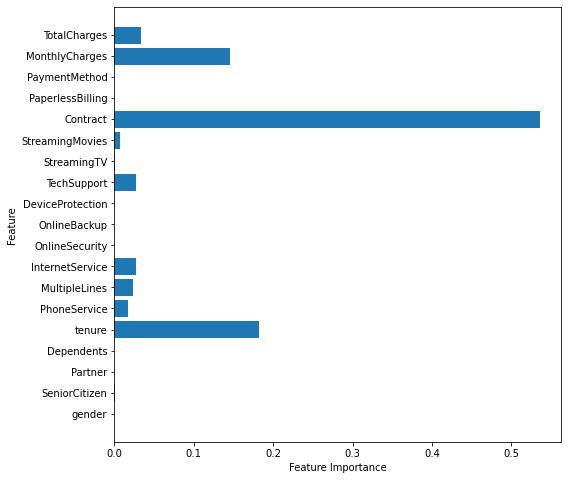

In [11]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_train.columns.values)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree_churn)

In [14]:
#prediction with basic tree

pred = tree_churn.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))


# The results will vary but I ran it once and got the below
#True positives = 1190
#True negatives = 209


#false positives = 112
#false negatiaves = 247

[[1190  112]
 [ 247  209]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1302
           1       0.65      0.46      0.54       456

    accuracy                           0.80      1758
   macro avg       0.74      0.69      0.70      1758
weighted avg       0.78      0.80      0.78      1758



In [16]:
churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [25]:
#bagged trees

bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth= 5), n_estimators=20)

In [26]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [29]:
bagged_tree.score(data_train, target_train)

0.8005309063329541

In [30]:
bagged_tree.score(data_test, target_test)

0.7992036405005688

In [36]:
#Random Forests

forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [37]:
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [38]:
forest.score(data_train, target_train)

0.8029958285930983

In [39]:
forest.score(data_test, target_test)

0.8048919226393629

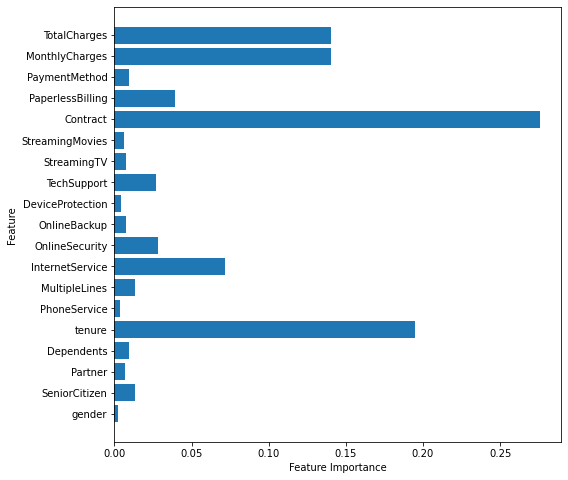

In [40]:
plot_feature_importances(forest)